In [17]:

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set()
sns.set_style("white")

import tensorflow as tf
from tensorflow import keras


import matplotlib as mpl
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


Using TensorFlow backend.


In [2]:
mpl.rcParams['figure.figsize'] = (6, 5)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
df = pd.read_csv('musk_csv.csv')
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


QUITE CLEARLY OUR ID AND CONFIRMATION_NAME COLS  ARE UNIQUE HENCE ARE OF NO USE TO US.

In [4]:
raw_df=df.drop(['ID','conformation_name'],axis=1)

In [5]:
raw_df.head()

,molecule_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,MUSK-211,46,-108,-60,-69,-117,49,38,-161,-8,...,-308,52,-7,39,126,156,-50,-112,96,1
1,MUSK-211,41,-188,-145,22,-117,-6,57,-171,-39,...,-59,-2,52,103,136,169,-61,-136,79,1
2,MUSK-211,46,-194,-145,28,-117,73,57,-168,-39,...,-134,-154,57,143,142,165,-67,-145,39,1
3,MUSK-211,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,136,168,-60,-135,80,1
4,MUSK-211,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,137,168,-60,-135,80,1


AS OUR MOLECULE NAME IS OF OBJECTTYPE, WE MAP IT TO NUMERICAL FEATURES TO USE IT AS A FEATURE FOR OUR CLASSIFICATION.

In [6]:
raw_df['molecule_name'] = pd.factorize(df['molecule_name'])[0]
raw_df.head()

,molecule_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,0,46,-108,-60,-69,-117,49,38,-161,-8,...,-308,52,-7,39,126,156,-50,-112,96,1
1,0,41,-188,-145,22,-117,-6,57,-171,-39,...,-59,-2,52,103,136,169,-61,-136,79,1
2,0,46,-194,-145,28,-117,73,57,-168,-39,...,-134,-154,57,143,142,165,-67,-145,39,1
3,0,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,136,168,-60,-135,80,1
4,0,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,137,168,-60,-135,80,1


In [7]:
raw_df['molecule_name'].value_counts()

89     1044
54     1010
90      911
81      383
59      344
39      286
40      277
5       215
71      141
53      140
46      135
50      104
56       83
10       82
2        78
4        73
14       64
85       63
101      63
58       59
47       53
43       48
27       43
51       40
26       36
49       34
37       32
1        31
60       29
52       29
       ... 
100       5
76        4
64        4
92        4
99        4
78        4
63        4
25        4
57        4
55        4
19        4
98        4
93        4
30        4
75        4
94        4
70        4
74        4
66        2
16        2
62        2
17        2
77        2
68        2
65        2
61        2
88        2
67        2
96        1
97        1
Name: molecule_name, Length: 102, dtype: int64

In [8]:
raw_df.describe()

,molecule_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,60.372840,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,27.185139,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,0.000000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,43.000000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,56.000000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,89.000000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,101.000000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


DROPPING ANY NULL VALUES IF PRESENT IN OUR DATAFRAME.

In [9]:
raw_df.dropna(inplace=True)

In [10]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(raw_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('class'))
val_labels = np.array(val_df.pop('class'))
test_labels = np.array(test_df.pop('class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

# Normalize the input features using the sklearn StandardScaler.
# This will set the mean to 0 and standard deviation to 1.
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (4222,)
Validation labels shape: (1056,)
Test labels shape: (1320,)
Training features shape: (4222, 167)
Validation features shape: (1056, 167)
Test features shape: (1320, 167)


In [11]:
bincount=np.bincount(train_labels)
bincount

array([3554,  668], dtype=int64)

In [12]:
neg, pos = np.bincount(train_labels)
print(neg,"and",pos)

3554 and 668


In [13]:
total = neg + pos
print('{} positive samples out of {} training samples ({:.2f}% of total)'.format(
    pos, total, 100 * pos / total))

668 positive samples out of 4222 training samples (15.82% of total)


Define the model and metrics
Define a function that creates a simple neural network with three densely connected hidden layers, 
an output sigmoid layer that returns the probability of a molecule belonginf to class 0 or 1,

and two dropout layers as an effective way to reduce overfitting.

In [14]:
def make_model():
    model = keras.Sequential([
      keras.layers.Dense(256, activation='relu',
                         input_shape=(train_features.shape[-1],)),
      keras.layers.Dense(256, activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(256, activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation='sigmoid'),
  ])
    metrics = [
      keras.metrics.Accuracy(name='accuracy'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),  
  ]
    model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=metrics)
    
    return model




Understanding useful metrics
Notice that there are a few metrics defined above that can be computed by the model that will be helpful when evaluating the performance.

False negatives and false positives are samples that were incorrectly classified
True negatives and true positives are samples that were correctly classified
Accuracy is the percentage of examples correctly classified > 
Precision is the percentage of predicted positives that were correctly classified > 
Recall is the percentage of actual positives that were correctly classified > 
AUC refers to the Area Under the Curve of a Receiver Operating Characteristic curve (ROC-AUC). 
This metric is equal to the probability that a classifier will rank a random positive sample higher than than a random negative sample.

Train a baseline model

Create and train your model using the function that was defined earlier. 

In [15]:
model = make_model()

EPOCHS = 10
BATCH_SIZE = 8



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Evaluate the baseline model
Evaluate your model on the test dataset and display results for the metrics you created above.



Evaluate your model on the test dataset and display the results for the metrics you created above.



Using OverSampling technique:

The goal is to identify classes of the compounds, but you don't have very many of those positive samples to work with, so you would want to have the classifier heavily weight the few examples that are available. You can do this by doing oversampling of +ve classes, Hence having both classes in equal proportion for learningto be uniform.

In [18]:
# with default args this will oversample the minority class to have an equal
# number of observations
smote = SMOTE()
res_features, res_labels = smote.fit_sample(train_features, train_labels)

res_neg, res_pos = np.bincount(res_labels)
res_total = res_neg + res_pos
print('{} positive samples out of {} training samples ({:.2f}% of total)'.format(
    res_pos, res_total, 100 * res_pos / res_total))

3554 positive samples out of 7108 training samples (50.00% of total)


In [19]:
resampled_model = make_model()

resampled_history = resampled_model.fit(
    res_features,
    res_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_features, val_labels))

Train on 7108 samples, validate on 1056 samples
Epoch 1/10
7108/7108 [==============================] - 4s 580us/sample - loss: 0.0667 - accuracy: 0.1369 - tp: 3458.0000 - fp: 90.0000 - tn: 3464.0000 - fn: 96.0000 - precision: 0.9746 - recall: 0.9730 - auc: 0.9971 - val_loss: 0.0014 - val_accuracy: 0.5265 - val_tp: 159.0000 - val_fp: 1.0000 - val_tn: 896.0000 - val_fn: 0.0000e+00 - val_precision: 0.9937 - val_recall: 1.0000 - val_auc: 1.0000
Epoch 2/10
7108/7108 [==============================] - 4s 506us/sample - loss: 0.0144 - accuracy: 0.3462 - tp: 3539.0000 - fp: 17.0000 - tn: 3537.0000 - fn: 15.0000 - precision: 0.9952 - recall: 0.9958 - auc: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.6146 - val_tp: 159.0000 - val_fp: 2.0000 - val_tn: 895.0000 - val_fn: 0.0000e+00 - val_precision: 0.9876 - val_recall: 1.0000 - val_auc: 1.0000
Epoch 3/10
7108/7108 [==============================] - 4s 526us/sample - loss: 0.0183 - accuracy: 0.4064 - tp: 3539.0000 - fp: 16.0000 - tn: 3538.0000 - fn

Plot metrics on the training and validation sets
Produce plots of your model's accuracy and loss on the training and validation set. These are useful to check for overfitting.

We can produce these plots for any of the metrics you created above. For example, False negatives.

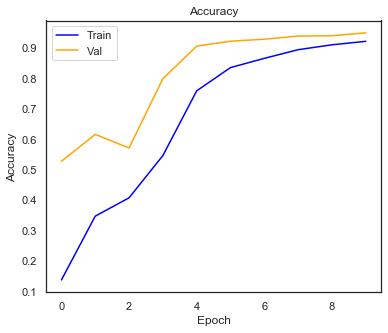

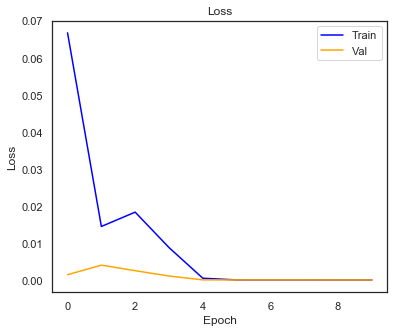

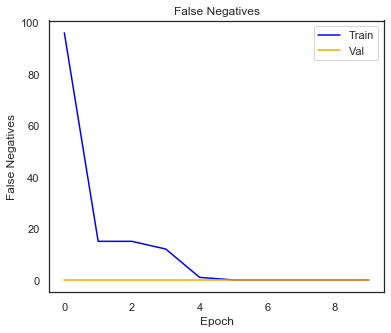

In [20]:
epochs = range(EPOCHS)

plt.title('Accuracy')
plt.plot(epochs,  resampled_history.history['accuracy'], color='blue', label='Train')
plt.plot(epochs, resampled_history.history['val_accuracy'], color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

_ = plt.figure()
plt.title('Loss')
plt.plot(epochs, resampled_history.history['loss'], color='blue', label='Train')
plt.plot(epochs, resampled_history.history['val_loss'], color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

_ = plt.figure()
plt.title('False Negatives')
plt.plot(epochs, resampled_history.history['fn'], color='blue', label='Train')
plt.plot(epochs, resampled_history.history['val_fn'], color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('False Negatives')
plt.legend()



In [21]:
train_predictions = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions= resampled_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions=resampled_model.predict(val_features, batch_size=BATCH_SIZE)

Examine the confusion matrix
You can use a confusion matrix to summarize the actual vs. predictmed labels where the X axis is the predicted label and the Y axis is the actual label.

In [22]:
def plot_cm(labels, predictions, p=0.5):
    
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate  -VE Classes Detected (True Negatives): ', cm[0][0])
    print('Legitimate -ve Classes Incorrectly Detected (False Positives): ', cm[0][1])
    print('Legitimate +ve Classes Missed (False Negatives): ', cm[1][0])
    print('Legitimate  +VE Classes Detected (True Positives): ', cm[1][1])
    print('Total +ve classes detected: ', np.sum(cm[1]))

loss :  9.871720227466291e-08
accuracy :  0.95333964
tp :  668.0
fp :  0.0
tn :  3554.0
fn :  0.0
precision :  1.0
recall :  1.0
auc :  1.0

Legitimate  -VE Classes Detected (True Negatives):  3554
Legitimate -ve Classes Incorrectly Detected (False Positives):  0
Legitimate +ve Classes Missed (False Negatives):  0
Legitimate  +VE Classes Detected (True Positives):  668
Total +ve classes detected:  668


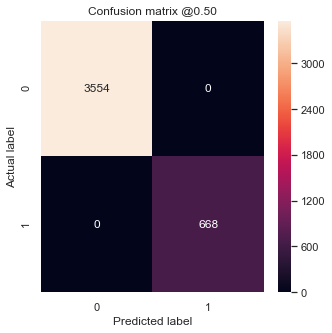

In [23]:
results = resampled_model.evaluate(train_features, train_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, results):
    print(name, ': ', value)
print()

plot_cm(train_labels, train_predictions)

loss :  8.853005681052502e-07
accuracy :  0.9488636
tp :  159.0
fp :  0.0
tn :  897.0
fn :  0.0
precision :  1.0
recall :  1.0
auc :  1.0

Legitimate  -VE Classes Detected (True Negatives):  897
Legitimate -ve Classes Incorrectly Detected (False Positives):  0
Legitimate +ve Classes Missed (False Negatives):  0
Legitimate  +VE Classes Detected (True Positives):  159
Total +ve classes detected:  159


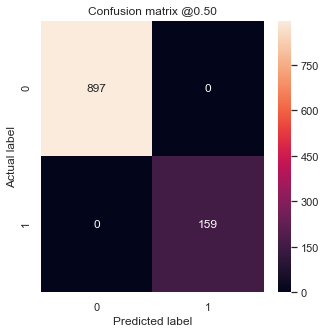

In [24]:
results = resampled_model.evaluate(val_features, val_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, results):
    print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions)

loss :  7.732628292908771e-07
accuracy :  0.94469696
tp :  190.0
fp :  0.0
tn :  1130.0
fn :  0.0
precision :  1.0
recall :  1.0
auc :  1.0

Legitimate  -VE Classes Detected (True Negatives):  1130
Legitimate -ve Classes Incorrectly Detected (False Positives):  0
Legitimate +ve Classes Missed (False Negatives):  0
Legitimate  +VE Classes Detected (True Positives):  190
Total +ve classes detected:  190


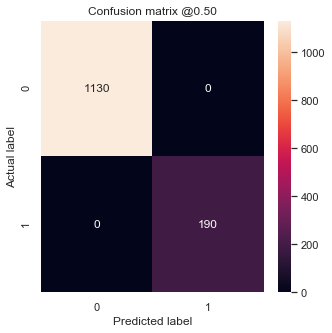

In [25]:
results = resampled_model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions)

Plot the ROC


Now plot the ROC. This plot is useful because it shows, at a glance, the range of performance the model can reach just by tuning the output threshold.

In [26]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

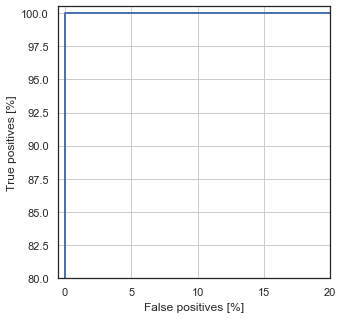

In [27]:
plot_roc("Train Baseline", train_labels, train_predictions, color=colors[0])


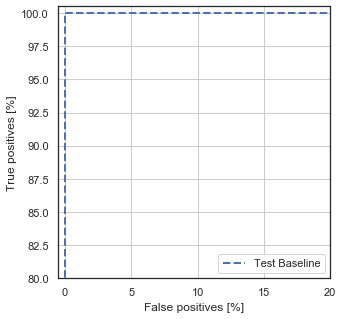

In [28]:
plot_roc("Test Baseline", test_labels, test_predictions, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

Final Conclusions

Here,Using our Model: 95%, 94% accuracy fort training data and test-set respectively with ROC of 1.